In [0]:
from google.colab import drive
drive.mount('/content/grdive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/grdive


[Errno 2] No such file or directory: 'Heart Disease Classification'
/content


In [0]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [0]:
class Support_Vector_Machine:
  
  def __init__(self,visualization=True):
    self.visualization=visualization
    self.colors={1:'r',-1:'b'}
    if self.visualization:
      self.fig=plt.figure()
      self.ax=self.fig.add_subplot(1,1,1)
  
  #training
  def fit(self,data):
    self.data=data
    #{||w||:[w,b]}
    
    opt_dict={}
    
    transforms=[[1,1],[-1,1],[-1,-1],[1,-1]] #to transform the weights vector
    all_data=[]
    for yi in self.data:
      for featureset in self.data[yi]:
        for feature in featureset:
          all_data.append(feature)
    
    self.max_feature_value=max(all_data)
    self.min_feature_value=min(all_data)
    all_data=None
    
    step_sizes=[self.max_feature_value *0.1,
                self.max_feature_value *0.01,
                #point of expense
                self.max_feature_value *0.001,]
    
    #extremely expensive
    b_range_multiple=5
    
    #
    b_multiple=5
    
    latest_optimum=self.max_feature_value*10
    
    for step in step_sizes:
      w=np.array([latest_optimum,latest_optimum])
      #we can do this because convex
      optimized=False
      while not optimized:
        for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                          self.max_feature_value*b_range_multiple,
                          step*b_multiple):
          for transformation in transforms:
            w_t= w*transformation
            found_option=True
            #weakest link in SVM fundamentally
            #SMO tries to fix this a bit
            #yi(xi.w+b)>=1
            # ##### add a break here
            for i in self.data:
              for xi in self.data[i]:
                yi=i
                if not yi*(np.dot(w_t,xi)+b)>=1:
                  found_option=False
                  break
            
            if found_option:
              opt_dict[np.linalg.norm(w_t)] =[w_t,b]
        
        if w[0]<0:
          optimized=True
          print('optimized a step')
        else:
          # say w=[5,5]  step=1 hence, w-step=[4,4]
          w=w - step
      
      norms=sorted([n for n in opt_dict])
      #||w||: [w,b]
      opt_choice=opt_dict[norms[0]]
      self.w=opt_choice[0]
      self.b=opt_choice[1]
      latest_optimum=opt_choice[0][0]+step*2  #single attribute summed with step 
      print(opt_choice)
    
    print(opt_dict)  
 
  
  
  def predict(self, features):
    #sign(x.w+b) >=0 then predict label 1 else label 0
    classification=np.sign(np.dot(np.array(features),self.w)+self.b)
    if classification !=0 and self.visualization:
      self.ax.scatter(features[0],features[1],s=200,marker='*',c=self.colors[classification])
    
    return classification
  
  def visualize(self):
    [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
    
    #hyperplane=x.w+b
    #v=x.w+b
    #psv =1
    #nsv =-1
    #dec=0
    
    def hyperplane(x,w,b,v):    # v is the value we are seeking
      return (-w[0]*x-b+v) / w[1]
    
    datarange=(self.min_feature_value*0.9, self.max_feature_value*1.1)
    hyp_x_min= datarange[0]
    hyp_x_max= datarange[1]
    
    #(wx+b)=1
    #positive support vector hyperplane
    psv1=hyperplane(hyp_x_min,self.w, self.b,1)
    psv2=hyperplane(hyp_x_max,self.w, self.b,1)
    self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2])
    
     #(wx+b)= -1
    #negetive support vector hyperplane
    nsv1=hyperplane(hyp_x_min,self.w, self.b,-1)
    nsv2=hyperplane(hyp_x_max,self.w, self.b,-1)
    self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2])
    
     #(wx+b)=0
    #positive support vector hyperplane
    db1=hyperplane(hyp_x_min,self.w, self.b,0)
    db2=hyperplane(hyp_x_max,self.w, self.b,0)
    self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2])
    
    plt.show()
    
    

optimized a step
[array([ 0.8, -0.8]), 0.0]
optimized a step
[array([ 0.32, -0.32]), 0.39999999999985647]
optimized a step
[array([ 0.224, -0.224]), 0.11999999999914479]
{113.13708498984761: [array([ 80, -80]), 36.0], 112.00571413994913: [array([ 79.2, -79.2]), 36.0], 110.87434329005066: [array([ 78.4, -78.4]), 36.0], 109.74297244015219: [array([ 77.6, -77.6]), 36.0], 108.61160159025371: [array([ 76.8, -76.8]), 36.0], 107.48023074035524: [array([ 76., -76.]), 36.0], 106.34885989045678: [array([ 75.2, -75.2]), 36.0], 105.2174890405583: [array([ 74.4, -74.4]), 36.0], 104.08611819065983: [array([ 73.6, -73.6]), 36.0], 102.95474734076136: [array([ 72.8, -72.8]), 36.0], 101.82337649086288: [array([ 72., -72.]), 36.0], 100.69200564096441: [array([ 71.2, -71.2]), 36.0], 99.56063479106594: [array([ 70.4, -70.4]), 36.0], 98.42926394116746: [array([ 69.6, -69.6]), 36.0], 97.29789309126899: [array([ 68.8, -68.8]), 36.0], 96.16652224137052: [array([ 68., -68.]), 36.0], 95.03515139147206: [array([ 

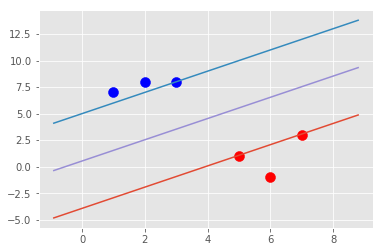

In [0]:
#This is the dataset 
data_dict={-1:np.array([[1,7],[2,8],[3,8], ]),
           1:np.array([[5,1],[6,-1],[7,3], ])}

svm=Support_Vector_Machine()
svm.fit(data=data_dict)
svm.visualize()

In [0]:
#This is the dataset 
data_dict={-1:np.array([[1,7],[2,8],[3,8], ]),
           1:np.array([[5,1],[6,-1],[7,3], ])}

'''
data=data_dict
all_data=[]
for yi in data:
      for featureset in data[yi]:
        for feature in featureset:
          all_data.append(feature)

print(all_data)
          
for i in data:
  for xi in data[i]:
    print(str(i)+" "+str(xi))
    '''

[1, 7, 2, 8, 3, 8, 5, 1, 6, -1, 7, 3]
-1 [1 7]
-1 [2 8]
-1 [3 8]
1 [5 1]
1 [ 6 -1]
1 [7 3]
